# Louiville space
TODO: write a class to create a superoperator from a given 
operator, and to transform a density matrix into a column vector, properly stripping the redundant elements of each.

The elements of the von Neumann equation are

$$
i \partial_{t} \rho_{j k}=\sum_{l, m} \mathcal{L}_{j k, l m} \rho_{l m} \equiv(\hat{\mathcal{L}} \hat{\rho})_{j k}
$$

where the Louiville superoperator is defined by:
$$
\mathcal{L}_{j k, l m}:=H_{j l} \delta_{m k}-\delta_{j l} H_{m k}
$$

See "General linear dynamics – quantum, classical or
hybrid" by Elze, Gambarotta and Vallone.

In [12]:
from numpy import *
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [29]:
def kd(i,j):
    "the kronecker delta"
    if i==j:
        return 1
    else:
        return 0
    
def superop(H,pruned=False):
    """
    returns the Louiville superoperator for an nxn operator H
    
    args:
        H: an nxn numpy array
        pruned: removes the redundant rows and columns if True. Only use for Hermitian matrices.
    returns:
        L, with L.shape = n^2 x n^2 numpy array if not pruned, else, (n*(n+1)/2,n*(n+1)/2) 
    """
    
    assert H.shape[0] == H.shape[1], "H should be a square matrix"
    n,_ = H.shape
    
    if pruned:
        print("pruning not yet supported")
    
    L = empty((n**2,n**2),type(H))
    
    # the new list of indices 0,1,2... for rows or columns of L
    #corresponds to pairs of the old indices: (0,0),(0,1),(0,2)...
    
    
    # todo: modify range of k and m so redundant matrix elements are omitted if pruned is true
    for j in range(n):
        for k in range(n):
            # the (j,k)th row of L
            for l in range(n):
                for m in range(n):
                    # the (l,m)th column of L
                    L[j*n+k,l*n+m] = H[j,l]*kd(m,k) - kd(j,k)*H[m,k]

    return L

# Two level Rabi oscillations - no decoherence

In [37]:
O = 2*pi*1
D = 0 # detuning
H = 0.5*array([[0,-O],[-O,2*D]],complex) # atom field Hamiltonian in RWA
Hsup = superop(H)
rho0 = array([1,0,0,0],complex) # r00,r01,r10,r11

numsteps = 100
tmin = 0
tmax = 3*2*pi/O
tpts = linspace(tmin,tmax,numsteps)

dpsi = lambda t,state: -1j*dot(Hsup,state)

soln = solve_ivp(dpsi,[tmin,tmax],rho0,t_eval=tpts,vectorized=True)

In [38]:
for i in range(Hsup.shape[1]):
    print(Hsup[i,:])

[0j (3.141592653589793+0j) (-3.141592653589793+0j) (3.141592653589793+0j)]
[0j 0j 0j (-3.141592653589793+0j)]
[(-3.141592653589793+0j) 0j 0j 0j]
[(3.141592653589793+0j) (-3.141592653589793+0j) (3.141592653589793+0j) 0j]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


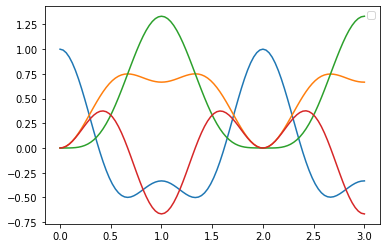

In [39]:
# labels = ['|g>','|e>']
# population = [soln.y[0],soln.y[3]]
for i,y in enumerate(soln.y):
    plt.plot(soln.t,real(y))#,label=labels[i])
plt.legend(loc='best')